In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [44]:
data = pd.read_csv('DataSets/twitter_MBTI/twitter_MBTI.csv')

In [45]:
from IPython.display import display

# Display the variables and data types in a table format
display(data.dtypes.to_frame().rename(columns={0: "Data Type"}))

# Display the first 5 rows of the dataset
display(data.head())

# Display dataset information
display(data.info())

# Display dataset summary statistics
display(data.describe())

# Display count of missing values in each variable
display(data.isnull().sum().to_frame().rename(columns={0: "Count of Missing Values"}))

,Data Type
Unnamed: 0,int64
text,object
label,object


,Unnamed: 0,text,label
0,0,@Pericles216 @HierBeforeTheAC @Sachinettiyil T...,intj
1,1,@Hispanthicckk Being you makes you look cute||...,intj
2,2,@Alshymi Les balles sont réelles et sont tirée...,intj
3,3,"I'm like entp but idiotic|||Hey boy, do you wa...",intj
4,4,@kaeshurr1 Give it to @ZargarShanif ... He has...,intj


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7811 entries, 0 to 7810
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7811 non-null   int64 
 1   text        7811 non-null   object
 2   label       7811 non-null   object
dtypes: int64(1), object(2)
memory usage: 183.2+ KB


None

,Unnamed: 0
count,7811.000000
mean,3905.000000
std,2254.985809
min,0.000000
25%,1952.500000
50%,3905.000000
75%,5857.500000
max,7810.000000


,Count of Missing Values
Unnamed: 0,0
text,0
label,0


### EDA

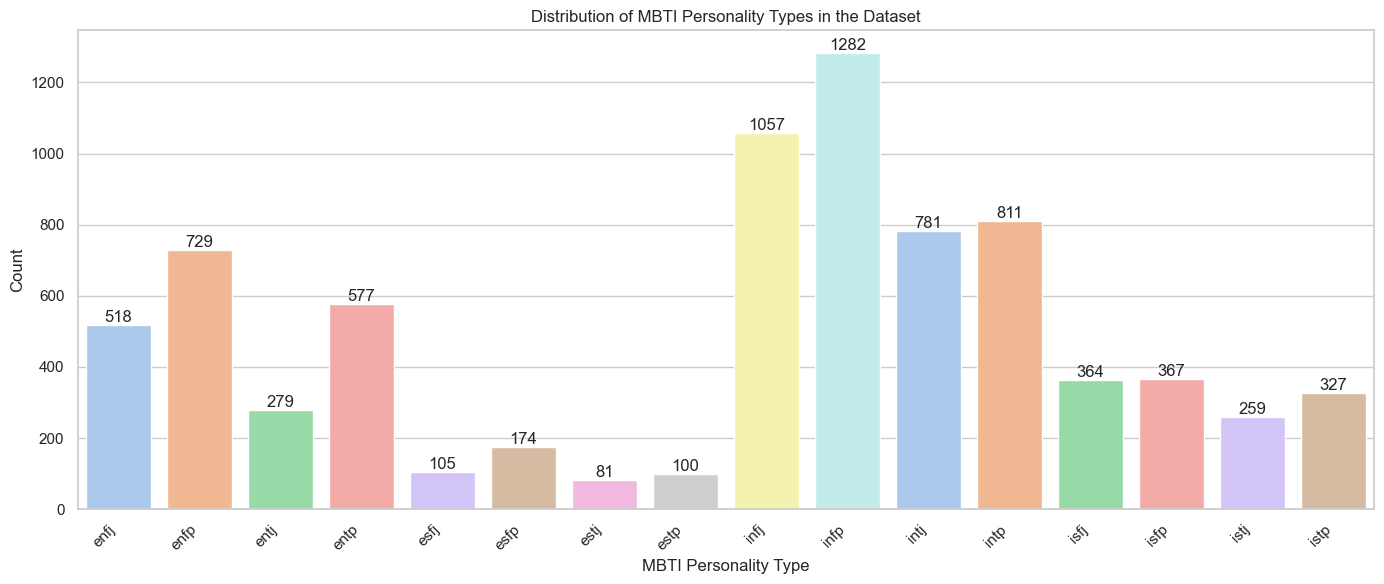

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and color palette
sns.set(style="whitegrid", palette="pastel")

# Create count plot with interactive features
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=data, x='label', order=sorted(data['label'].unique()),
                   palette="pastel")
ax.set_title('Distribution of MBTI Personality Types in the Dataset')
ax.set_xlabel('MBTI Personality Type')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.tight_layout()

# Show interactive plot
plt.show()

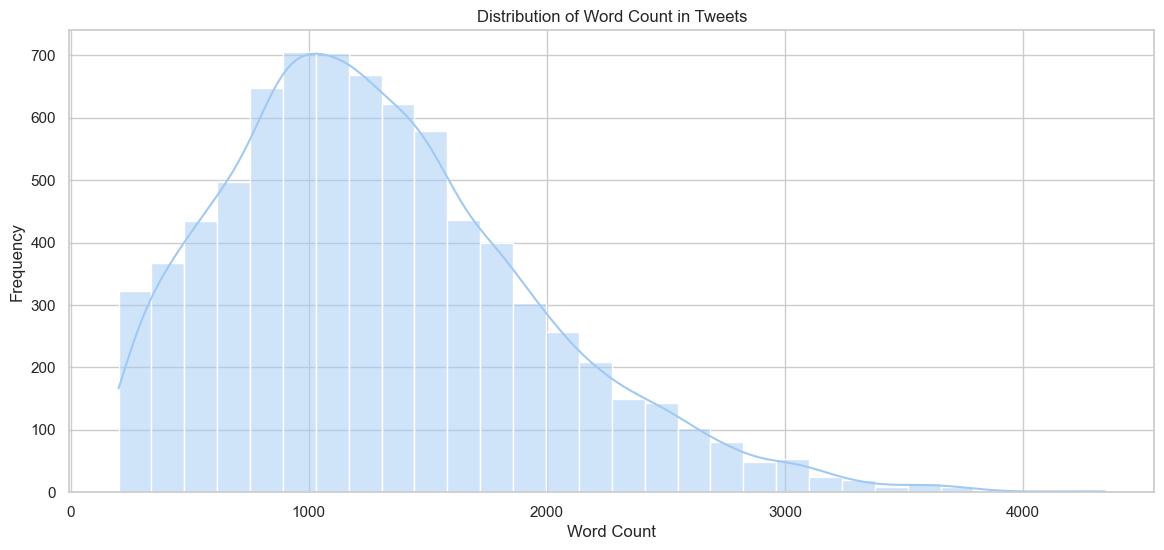

In [47]:
# Add a new column for the word count of each tweet
data['word_count'] = data['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(14, 6))
sns.histplot(data=data, x='word_count', bins=30, kde=True)
plt.title('Distribution of Word Count in Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

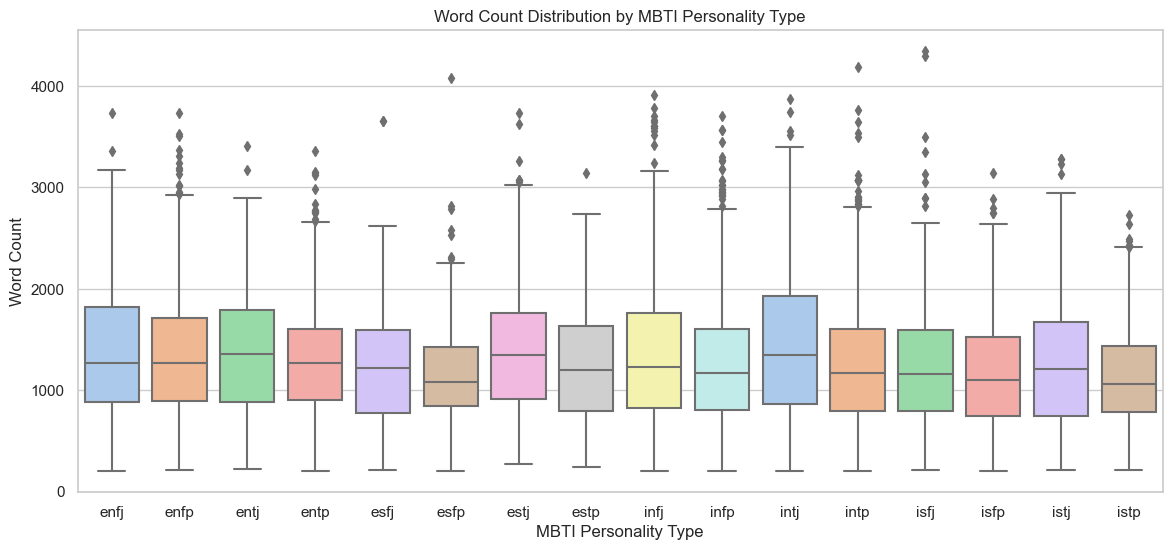

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define color palette
color_palette = sns.color_palette("pastel")

# Create box plot with pastel colors and interactivity
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=data, x='label', y='word_count',
                 order=sorted(data['label'].unique()),
                 palette=color_palette)
ax.set_title('Word Count Distribution by MBTI Personality Type')
ax.set_xlabel('MBTI Personality Type')
ax.set_ylabel('Word Count')
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .7))

# Show interactive plot
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Define color palette
color_palette = px.colors.qualitative.Pastel

# Get value counts for each personality type
label_counts = data["label"].value_counts()

# Create pie chart with pastel colors
fig = px.pie(names=label_counts.index, values=label_counts.values,
             title="Distribution of MBTI Personality Types in the Dataset",
             color_discrete_sequence=color_palette)

# Update chart labels and font
fig.update_traces(textposition="inside", textinfo="percent+label",
                  marker=dict(line=dict(color="#000000", width=1)))
fig.update_layout(title_font=dict(size=24, color="darkblue"),
                  legend=dict(title="MBTI Personality Type",
                              font=dict(size=12, color="black")),
                  font=dict(size=12, color="black"))

# Show interactive plot
fig.show()